<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [117]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


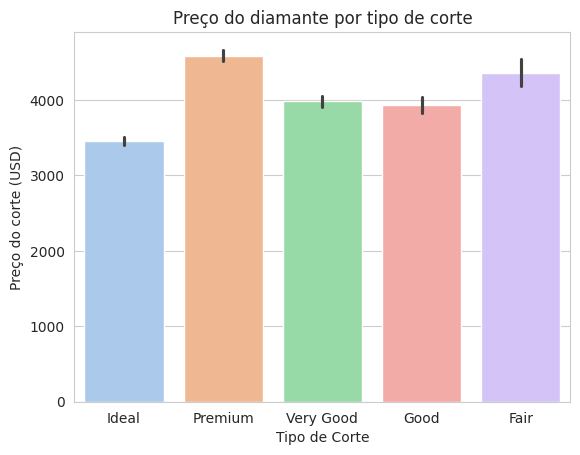

In [127]:
# gráfico do exercício 1

grafico = sns.barplot(data=data, x='cut', y='price', hue='cut', palette='pastel', legend=False)
grafico.set(title='Preço do diamante por tipo de corte', xlabel='Tipo de Corte', ylabel='Preço do corte (USD)');

**Insight do gráfico 1**: ...

Ao observar o gráfico, é evidente a variação significativa nos valores conforme o tipo de corte, refletindo a qualidade do corte e seu impacto no preço. O corte **Ideal** é o mais acessível, enquanto o **Premium** é o mais caro, devido à sua qualidade e formato superiores. Notavelmente, **Very Good** e **Good** parecem estar na mesma faixa de preço, sugerindo semelhanças em seus cortes.

## 2\. Número de passageiros em dezembro por ano

In [129]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [207]:
dec_data = data[data['month'] == 'Dec']
flights = dec_data.groupby('year').agg({'passengers': 'sum'}).reset_index()

flights.head()

,year,passengers
0,1949,118
1,1950,140
2,1951,166
3,1952,194
4,1953,201


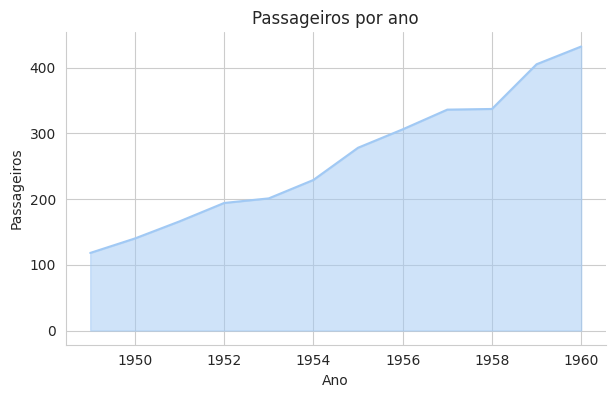

In [212]:
# gráfico do exercício 2

import matplotlib.pyplot as plt

with sns.axes_style('whitegrid'):
  grafico = sns.FacetGrid(data=flights, palette="pastel")
  grafico.map(sns.lineplot, "year", "passengers")
  grafico.map(plt.fill_between, 'year', 'passengers', alpha=0.5)
  grafico.set(title='Passageiros por ano', xlabel='Ano', ylabel='Passageiros');
  grafico.fig.set_size_inches(w=20/2.54,  h=10.5/2.54)

**Insight do gráfico 2**: ...

A análise do gráfico revela um aumento notável no número de **passageiros** ao longo dos **anos**. Esse padrão sugere um possível aumento na utilização de aviões como meio de transporte, talvez influenciado por avanços tecnológicos, promoções e outras circunstâncias que incentivam viagens aéreas.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [178]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


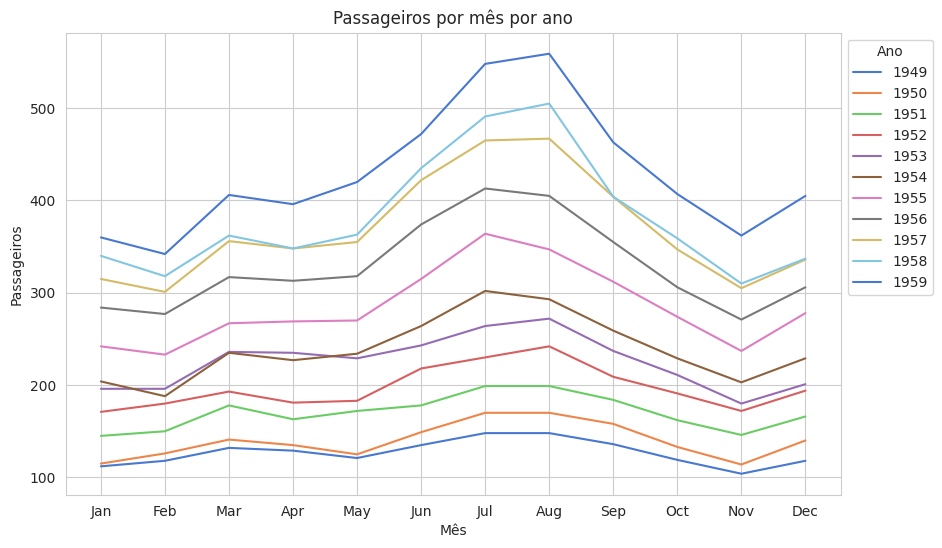

In [204]:
# gráfico do exercício 3

flights = data.query("1949 <= year < 1960")

with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  grafico = sns.lineplot(data=flights, x="month", y="passengers", hue="year", palette="muted")
  grafico.set(title='Passageiros por mês por ano', xlabel='Mês', ylabel='Passageiros');
  grafico.legend(title="Ano", loc='upper left', bbox_to_anchor=(1, 1))

**Insight do gráfico 3**: ...

Notamos que os meses de **fevereiro** e **novembro** tendem a ter menos passageiros, independentemente do ano. Por outro lado, em **1949**, observamos um aumento notável no número de passageiros por mes, com um aumento de mais de 500 passageiros em relação aos meses anteriores. Isso pode ser atribuído a promoções de voos ou eventos específicos que incentivaram viagens aéreas durante esse período. No entanto, em **1950**, vemos uma diminuição acentuada no número de passageiros em comparação com o ano anterior, o que pode ser resultado de condições econômicas ou mudanças nas políticas de viagens.Além disso, é evidente que, independentemente do ano, os meses de **julho** e **agosto** apresentam um aumento significativo no número de passageiros. Isso pode ser atribuído às férias de meio de ano e às promoções nas passagens aéreas, que incentivam mais pessoas a viajarem durante esse período.


---